Using TensorFlow backend.


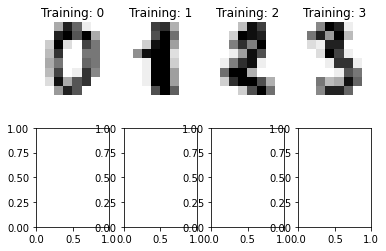

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

import keras
from keras.datasets import mnist
from keras.models import Sequential
from tensorflow.keras.regularizers import l2
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.wrappers.scikit_learn import KerasClassifier
from keras import backend as K
from sklearn.model_selection import GridSearchCV

# Load the digits dataset and visualize
digits = datasets.load_digits()
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [0]:
# Reshape the data for keras
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [0]:
# Split data into train and test subsets
X_train_val, X_test, y_train_val, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, shuffle=False)

In [0]:
def create_model(l2_penalty):
    model = Sequential()
    model.add(Dense(128, activation='relu', kernel_regularizer = l2(l2_penalty)))
    model.add(Dense(128, activation='relu', kernel_regularizer = l2(l2_penalty)))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adadelta',
                  metrics=['accuracy'])
    return model

In [0]:
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
l2_penalty = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1]
param_grid = dict(l2_penalty = l2_penalty)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_val, y_val)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.395556 using {'l2_penalty': 0.0001}
0.395556 (0.063790) with: {'l2_penalty': 0.0001}
0.302222 (0.080247) with: {'l2_penalty': 0.001}
0.328889 (0.093861) with: {'l2_penalty': 0.005}
0.320000 (0.057607) with: {'l2_penalty': 0.01}
0.311111 (0.050283) with: {'l2_penalty': 0.05}
0.351111 (0.022662) with: {'l2_penalty': 0.1}


In [0]:
model = create_model(0.0001)
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
673/673 [==============================] - 0s 225us/step - loss: 1.5192 - accuracy: 0.6033
Epoch 2/5
673/673 [==============================] - 0s 54us/step - loss: 0.3830 - accuracy: 0.8811
Epoch 3/5
673/673 [==============================] - 0s 57us/step - loss: 0.1746 - accuracy: 0.9569
Epoch 4/5
673/673 [==============================] - 0s 57us/step - loss: 0.1066 - accuracy: 0.9837
Epoch 5/5
673/673 [==============================] - 0s 53us/step - loss: 0.0805 - accuracy: 0.9866


In [0]:
model.evaluate(X_test,  y_test, verbose=2)

[0.4792458794439197, 0.8631812930107117]